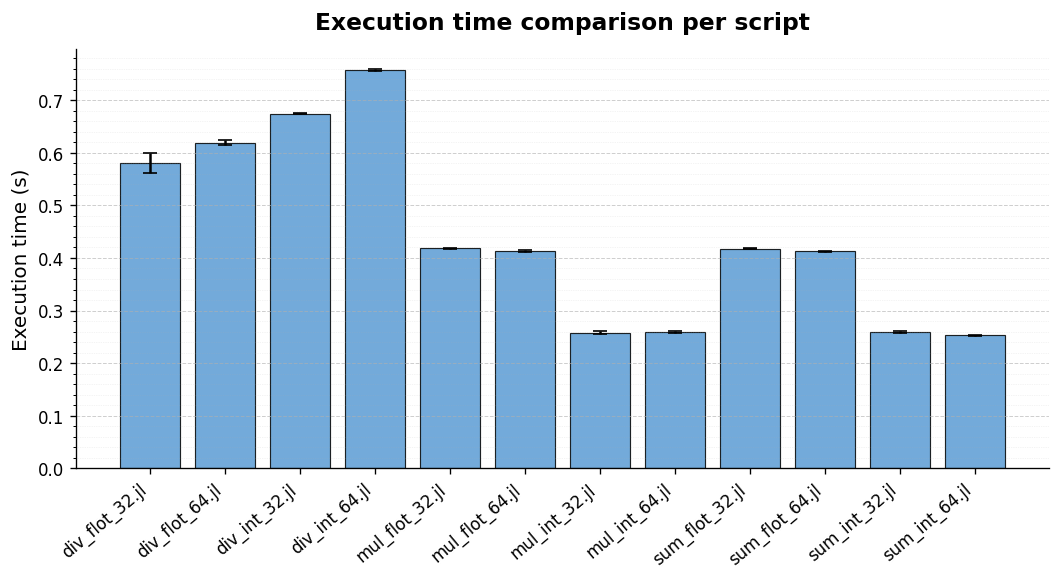

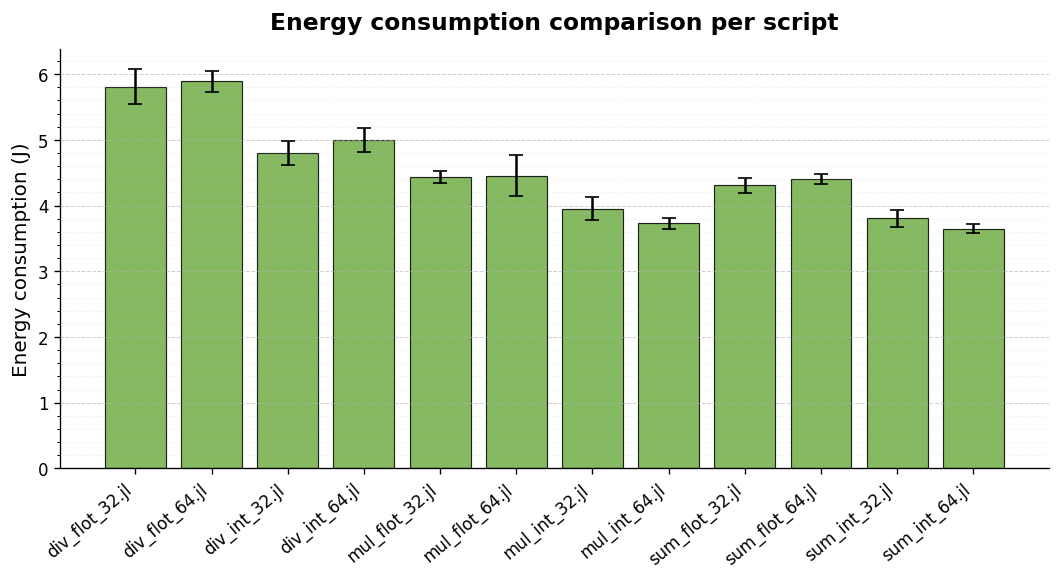

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

# === Read CSV ===
df = pd.read_csv("resultados_energia.csv")

# === Group by script and compute statistics ===
stats = df.groupby("script").agg({
    "tiempo_s(segundos)": ["mean", "var", "std"],
    "energia_j(julios)": ["mean", "var", "std"]
}).reset_index()

# Rename columns
stats.columns = ["script",
                 "time_mean", "time_var", "time_std",
                 "energy_mean", "energy_var", "energy_std"]

# Round for display
stats = stats.round(4)

# === Global plotting style configuration ===
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.size": 12,
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "axes.titleweight": "bold",
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.dpi": 120
})

# === Function for professional scientific plotting ===
def plot_professional(x, y, yerr, color, ylabel, title, filename):
    fig, ax = plt.subplots(figsize=(9, 5))
    
    bars = ax.bar(x, y, yerr=yerr, capsize=4,
                  color=color, edgecolor="black", linewidth=0.7, alpha=0.85)
    
    # Grid lines
    ax.grid(axis="y", linestyle="--", alpha=0.6, linewidth=0.6)
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(which='minor', axis='y', linestyle=':', alpha=0.3, linewidth=0.4)
    
    # Axes and title
    ax.set_ylabel(ylabel)
    ax.set_title(title, pad=12)
    ax.set_xticks(range(len(x)))
    ax.set_xticklabels(x, rotation=40, ha='right')
    
    # Clean look
    ax.set_facecolor("white")
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()


# === Execution Time Comparison ===
plot_professional(
    stats["script"],
    stats["time_mean"],
    stats["time_std"],
    color="#5A9BD4",
    ylabel="Execution time (s)",
    title="Execution time comparison per script",
    filename="execution_time_comparison.png"
)

# === Energy Consumption Comparison ===
plot_professional(
    stats["script"],
    stats["energy_mean"],
    stats["energy_std"],
    color="#70AD47",
    ylabel="Energy consumption (J)",
    title="Energy consumption comparison per script",
    filename="energy_consumption_comparison.png"
)


Estadísticas agrupadas:
    bits operacion  tipo  tiempo_promedio  tiempo_varianza  tiempo_std  \
0    32       div  flot           0.5809           0.0004      0.0193   
1    32       div   int           0.6746           0.0000      0.0015   
2    32       mul  flot           0.4180           0.0000      0.0012   
3    32       mul   int           0.2580           0.0000      0.0031   
4    32       sum  flot           0.4176           0.0000      0.0014   
5    32       sum   int           0.2591           0.0000      0.0018   
6    64       div  flot           0.6192           0.0000      0.0042   
7    64       div   int           0.7574           0.0000      0.0015   
8    64       mul  flot           0.4132           0.0000      0.0019   
9    64       mul   int           0.2596           0.0000      0.0015   
10   64       sum  flot           0.4125           0.0000      0.0011   
11   64       sum   int           0.2530           0.0000      0.0014   

    energia_promedio  ene

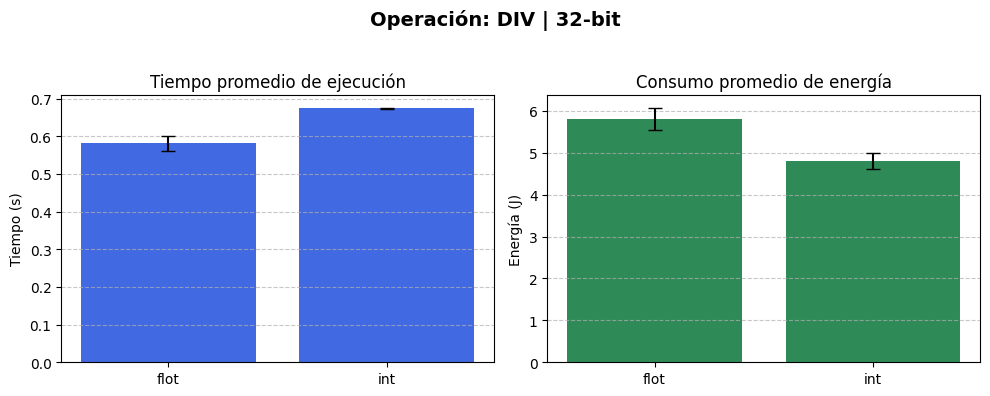

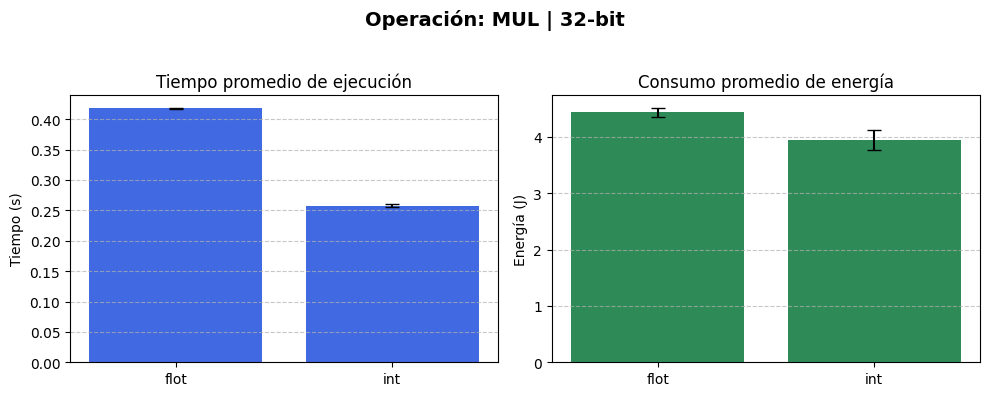

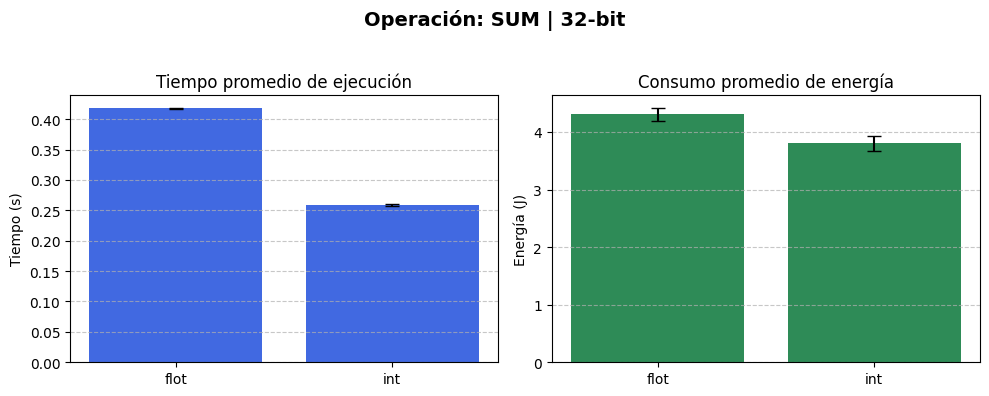

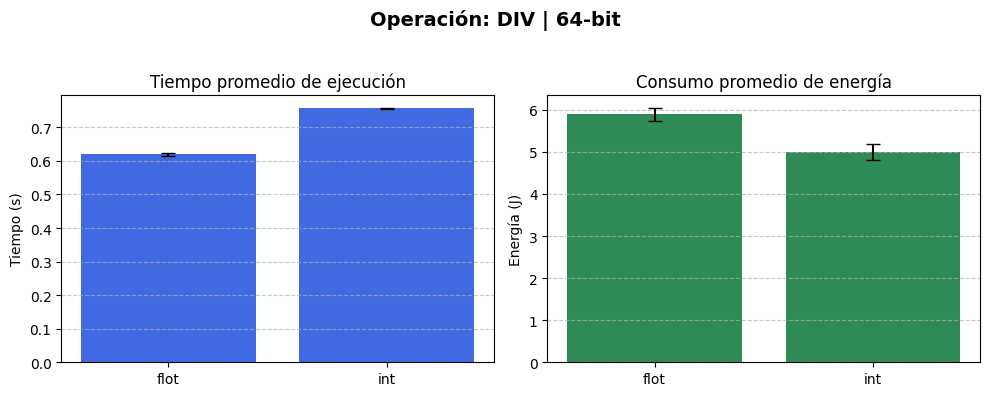

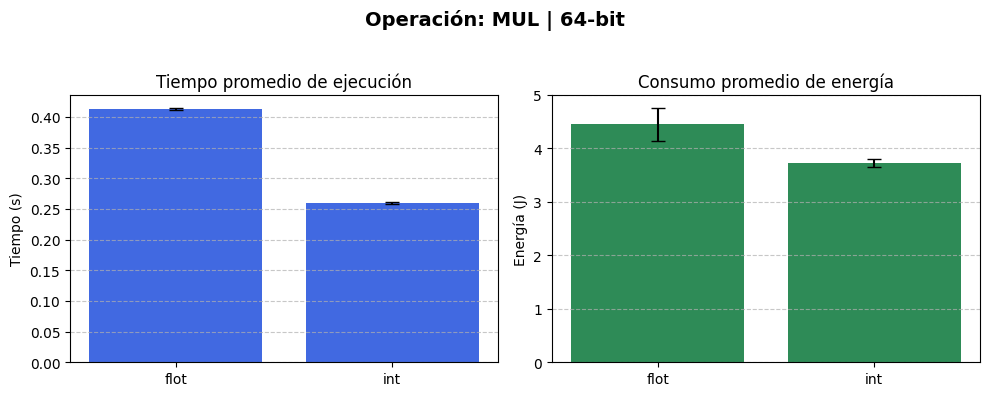

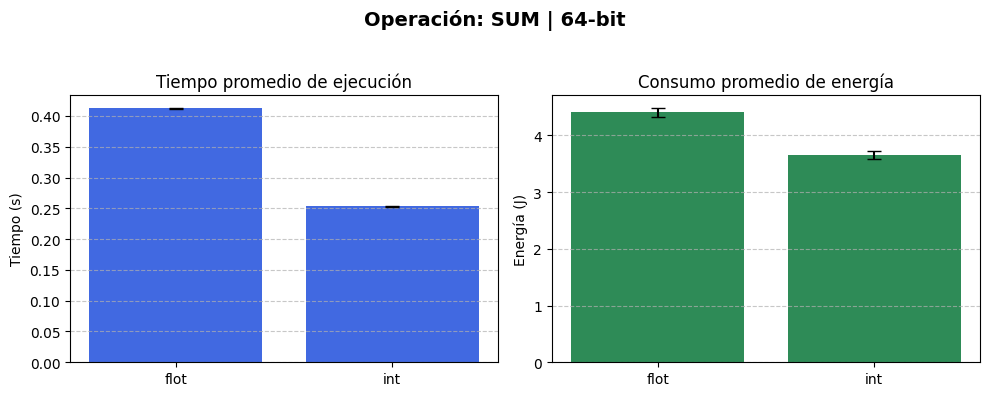

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === Leer CSV ===
df = pd.read_csv("resultados_energia.csv")

# === Extraer información de nombre del script ===
# Ejemplo: div_flot_32.jl → operacion=div, tipo=flot, bits=32
df["operacion"] = df["script"].str.extract(r"^(div|mul|sum)")
df["tipo"] = df["script"].str.extract(r"_(float|int)_")
df["bits"] = df["script"].str.extract(r"_(32|64)")

# === Calcular estadísticas ===
stats = df.groupby(["bits", "operacion", "tipo"]).agg({
    "tiempo_s(segundos)": ["mean", "var", "std"],
    "energia_j(julios)": ["mean", "var", "std"]
}).reset_index()

# Renombrar columnas
stats.columns = ["bits", "operacion", "tipo",
                 "tiempo_promedio", "tiempo_varianza", "tiempo_std",
                 "energia_promedio", "energia_varianza", "energia_std"]

# Redondear para visualización
stats = stats.round(4)
print("Estadísticas agrupadas:\n", stats)

# === Función para graficar por bits y operación ===
def graficar(bits, operacion, df_stats):
    subset = df_stats[(df_stats["bits"] == bits) & (df_stats["operacion"] == operacion)]
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f"Operación: {operacion.upper()} | {bits}-bit", fontsize=14, weight="bold")

    # --- Tiempo ---
    axs[0].bar(subset["tipo"], subset["tiempo_promedio"],
               yerr=subset["tiempo_std"], capsize=5, color="royalblue")
    axs[0].set_ylabel("Tiempo (s)")
    axs[0].set_title("Tiempo promedio de ejecución")
    axs[0].grid(axis="y", linestyle="--", alpha=0.7)

    # --- Energía ---
    axs[1].bar(subset["tipo"], subset["energia_promedio"],
               yerr=subset["energia_std"], capsize=5, color="seagreen")
    axs[1].set_ylabel("Energía (J)")
    axs[1].set_title("Consumo promedio de energía")
    axs[1].grid(axis="y", linestyle="--", alpha=0.7)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# === Generar las 6 gráficas ===
for bits in ["32", "64"]:
    for op in ["div", "mul", "sum"]:
        graficar(bits, op, stats)


/tmp/ipykernel_239654/3767464446.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subset["type"], fontsize=11)
/tmp/ipykernel_239654/3767464446.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subset["type"], fontsize=11)
/tmp/ipykernel_239654/3767464446.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subset["type"], fontsize=11)
/tmp/ipykernel_239654/3767464446.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subset["type"], fontsize=11)
/tmp/ipykernel_239654/3767464446.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. aft

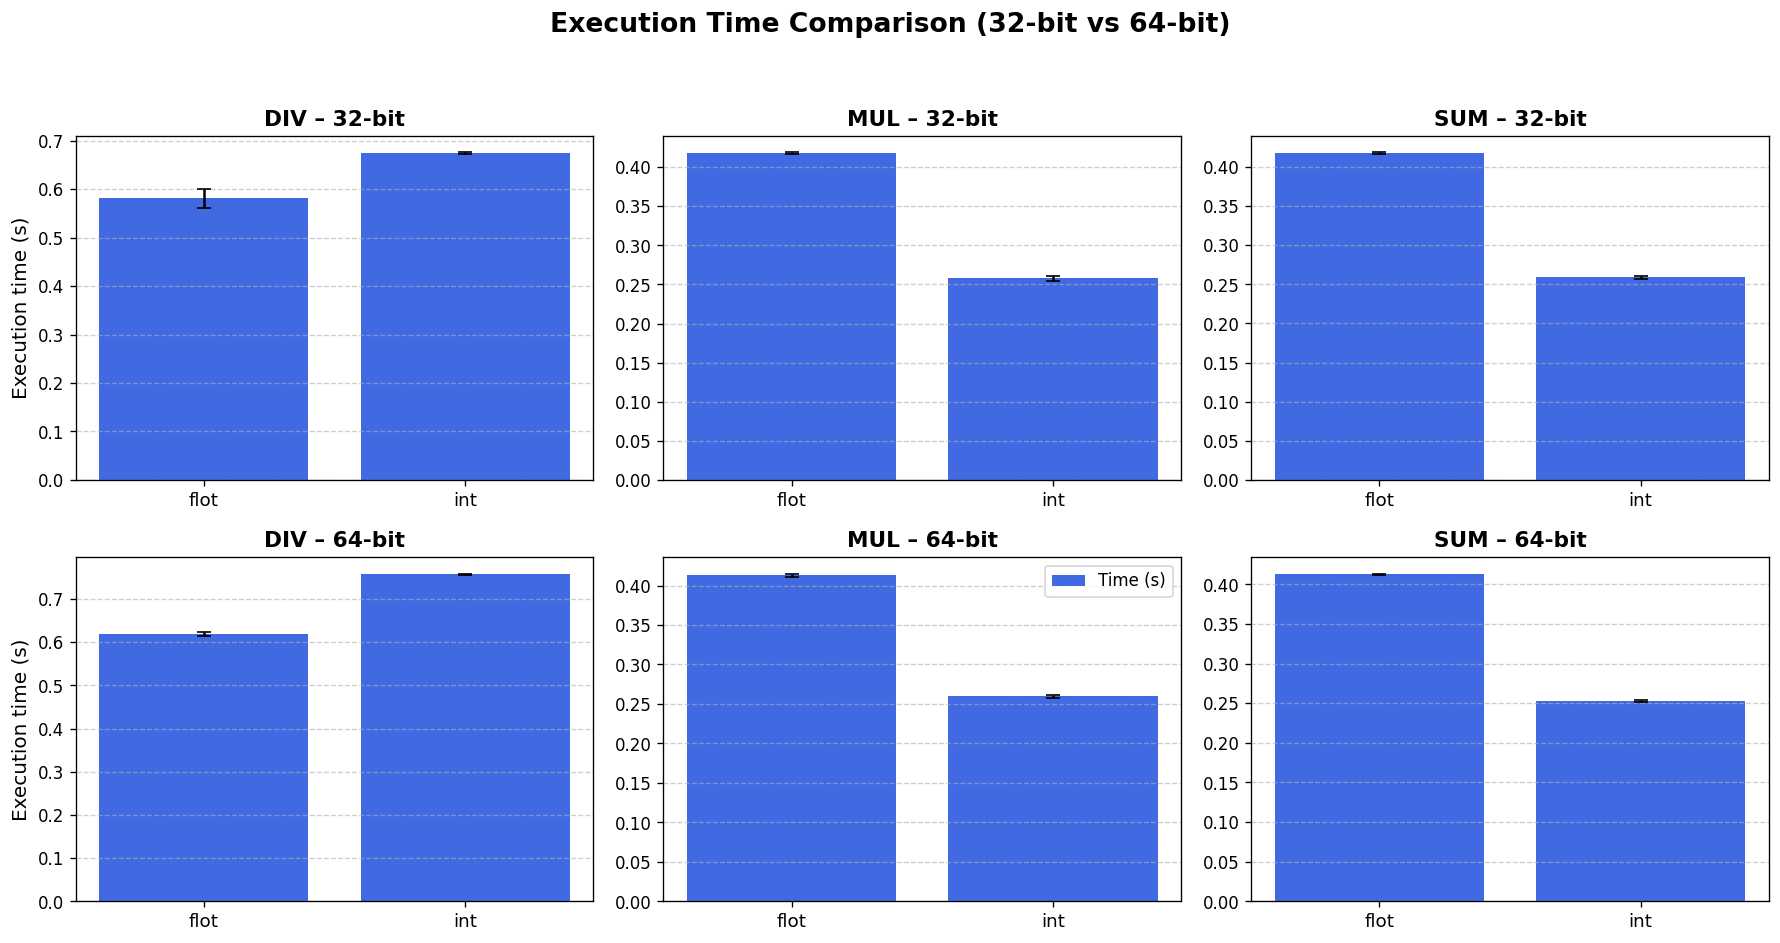

/tmp/ipykernel_239654/3767464446.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subset["type"], fontsize=11)
/tmp/ipykernel_239654/3767464446.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subset["type"], fontsize=11)
/tmp/ipykernel_239654/3767464446.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subset["type"], fontsize=11)
/tmp/ipykernel_239654/3767464446.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(subset["type"], fontsize=11)
/tmp/ipykernel_239654/3767464446.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. aft

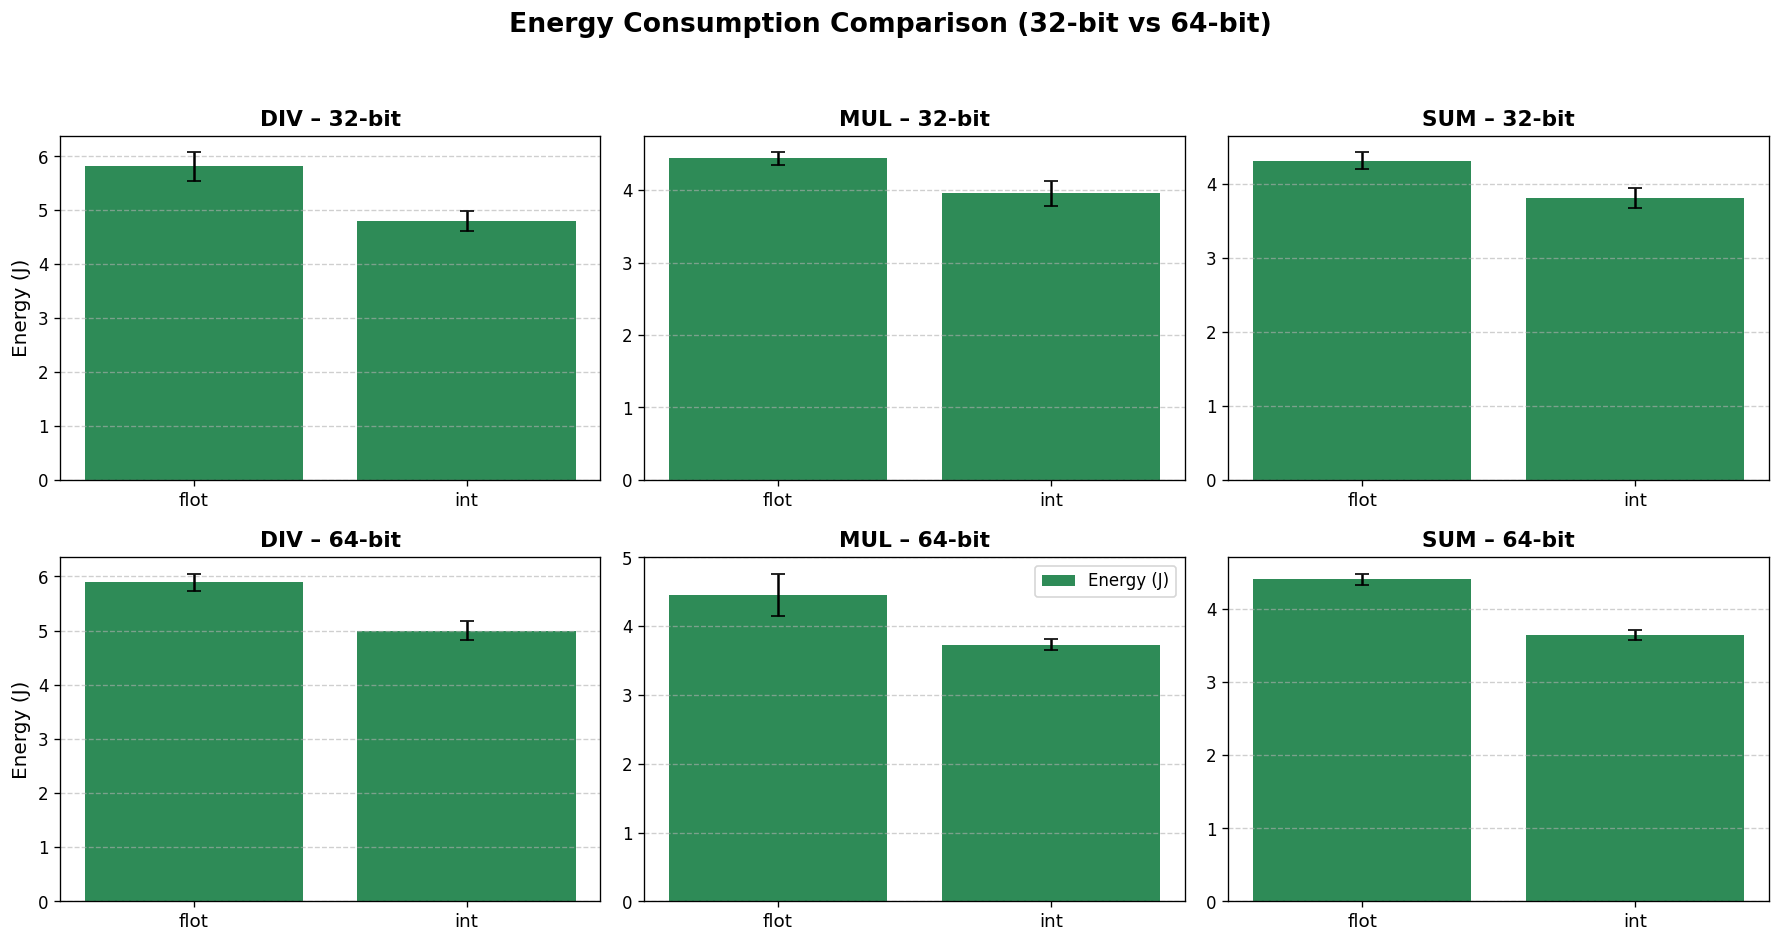

<Figure size 768x576 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === Read CSV ===
df = pd.read_csv("resultados_energia.csv")

# === Extract information from script names ===
df["operation"] = df["script"].str.extract(r"^(div|mul|sum)")
df["type"] = df["script"].str.extract(r"_(float|int)_")
df["bits"] = df["script"].str.extract(r"_(32|64)")

# === Compute statistics ===
stats = df.groupby(["bits", "operation", "type"]).agg({
    "tiempo_s(segundos)": ["mean", "var", "std"],
    "energia_j(julios)": ["mean", "var", "std"]
}).reset_index()

# Rename columns
stats.columns = ["bits", "operation", "type",
                 "time_mean", "time_var", "time_std",
                 "energy_mean", "energy_var", "energy_std"]

# Round values for readability
stats = stats.round(4)

# === Common parameters ===
operations = ["div", "mul", "sum"]
bits_levels = ["32", "64"]

# === === FIGURE 1: EXECUTION TIME (2x3) === ===
fig_time, axes_t = plt.subplots(2, 3, figsize=(15, 8))
fig_time.suptitle("Execution Time Comparison (32-bit vs 64-bit)",
                  fontsize=16, weight="bold", y=0.98)

for i, bits in enumerate(bits_levels):
    for j, op in enumerate(operations):
        ax = axes_t[i, j]
        subset = stats[(stats["bits"] == bits) & (stats["operation"] == op)]

        ax.bar(subset["type"], subset["time_mean"],
               yerr=subset["time_std"], capsize=4,
               color="royalblue", label="Time (s)")

        ax.set_title(f"{op.upper()} – {bits}-bit", fontsize=13, weight="bold")
        ax.set_ylabel("Execution time (s)" if j == 0 else "", fontsize=12)
        ax.set_xticklabels(subset["type"], fontsize=11)
        ax.grid(axis="y", linestyle="--", alpha=0.6)

        if i == 1 and j == 1:
            ax.legend(fontsize=10, loc="upper right")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
# plt.savefig("execution_time_2x3.png", dpi=300, bbox_inches="tight")


# === === FIGURE 2: ENERGY CONSUMPTION (2x3) === ===
fig_energy, axes_e = plt.subplots(2, 3, figsize=(15, 8))
fig_energy.suptitle("Energy Consumption Comparison (32-bit vs 64-bit)",
                    fontsize=16, weight="bold", y=0.98)

for i, bits in enumerate(bits_levels):
    for j, op in enumerate(operations):
        ax = axes_e[i, j]
        subset = stats[(stats["bits"] == bits) & (stats["operation"] == op)]

        ax.bar(subset["type"], subset["energy_mean"],
               yerr=subset["energy_std"], capsize=4,
               color="seagreen", label="Energy (J)")

        ax.set_title(f"{op.upper()} – {bits}-bit", fontsize=13, weight="bold")
        ax.set_ylabel("Energy (J)" if j == 0 else "", fontsize=12)
        ax.set_xticklabels(subset["type"], fontsize=11)
        ax.grid(axis="y", linestyle="--", alpha=0.6)

        if i == 1 and j == 1:
            ax.legend(fontsize=10, loc="upper right")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
# plt.savefig("energy_comparison_2x3.png", dpi=300, bbox_inches="tight")
